<a href="https://colab.research.google.com/github/ME-UoP-ME421/Kalman-CTT/blob/main/ME422_Vibrations_Lab_Kalman_CTT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **ME422 - Vibration - Lab - Procedure**



1.   Answer the in the lab, [pre-requisite competency assessment quiz.](https://feelsnew.pdn.ac.lk/mod/quiz/view.php?id=7855)
2.   With detailed justification derive the governing equations for the small amplitude motion of the system assigned to your group. 
3. Simulate and animate the small amplitude motion of the system and use the simulations to provide, with justification, a qualitative desrcription of the small amplitude motion of the system
4. Dvelop a Rashpberry Pi based data aquistion system and use that to measure the natural frequencies of the 2-DOF rotational plus translational system in the applied mechanics lab
5. All your work will be collected and reported in a .ipynb notebook that will be maintained in a Github repository allocated to your group. All equations and mathematical expressions should be typed in LaTeX and all comutations should be performed using Python and should be contained in the same .ipynb notebbok.



#Q - Coupled Torsional and Translational System: Group Kalman-CTT

* E/17/035
* E/17/259
* E/17/388

# Setup

In [2]:
#importing the libraries
import numpy as np
import scipy as sp
from scipy.integrate import odeint
import math
from numpy import linalg

import sympy
from sympy import symbols
from sympy import *

import plotly.graph_objects as go
import plotly.express as px
import matplotlib.pyplot as plt

import plotly.graph_objs as go
from plotly.subplots import make_subplots


from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation


# Problem

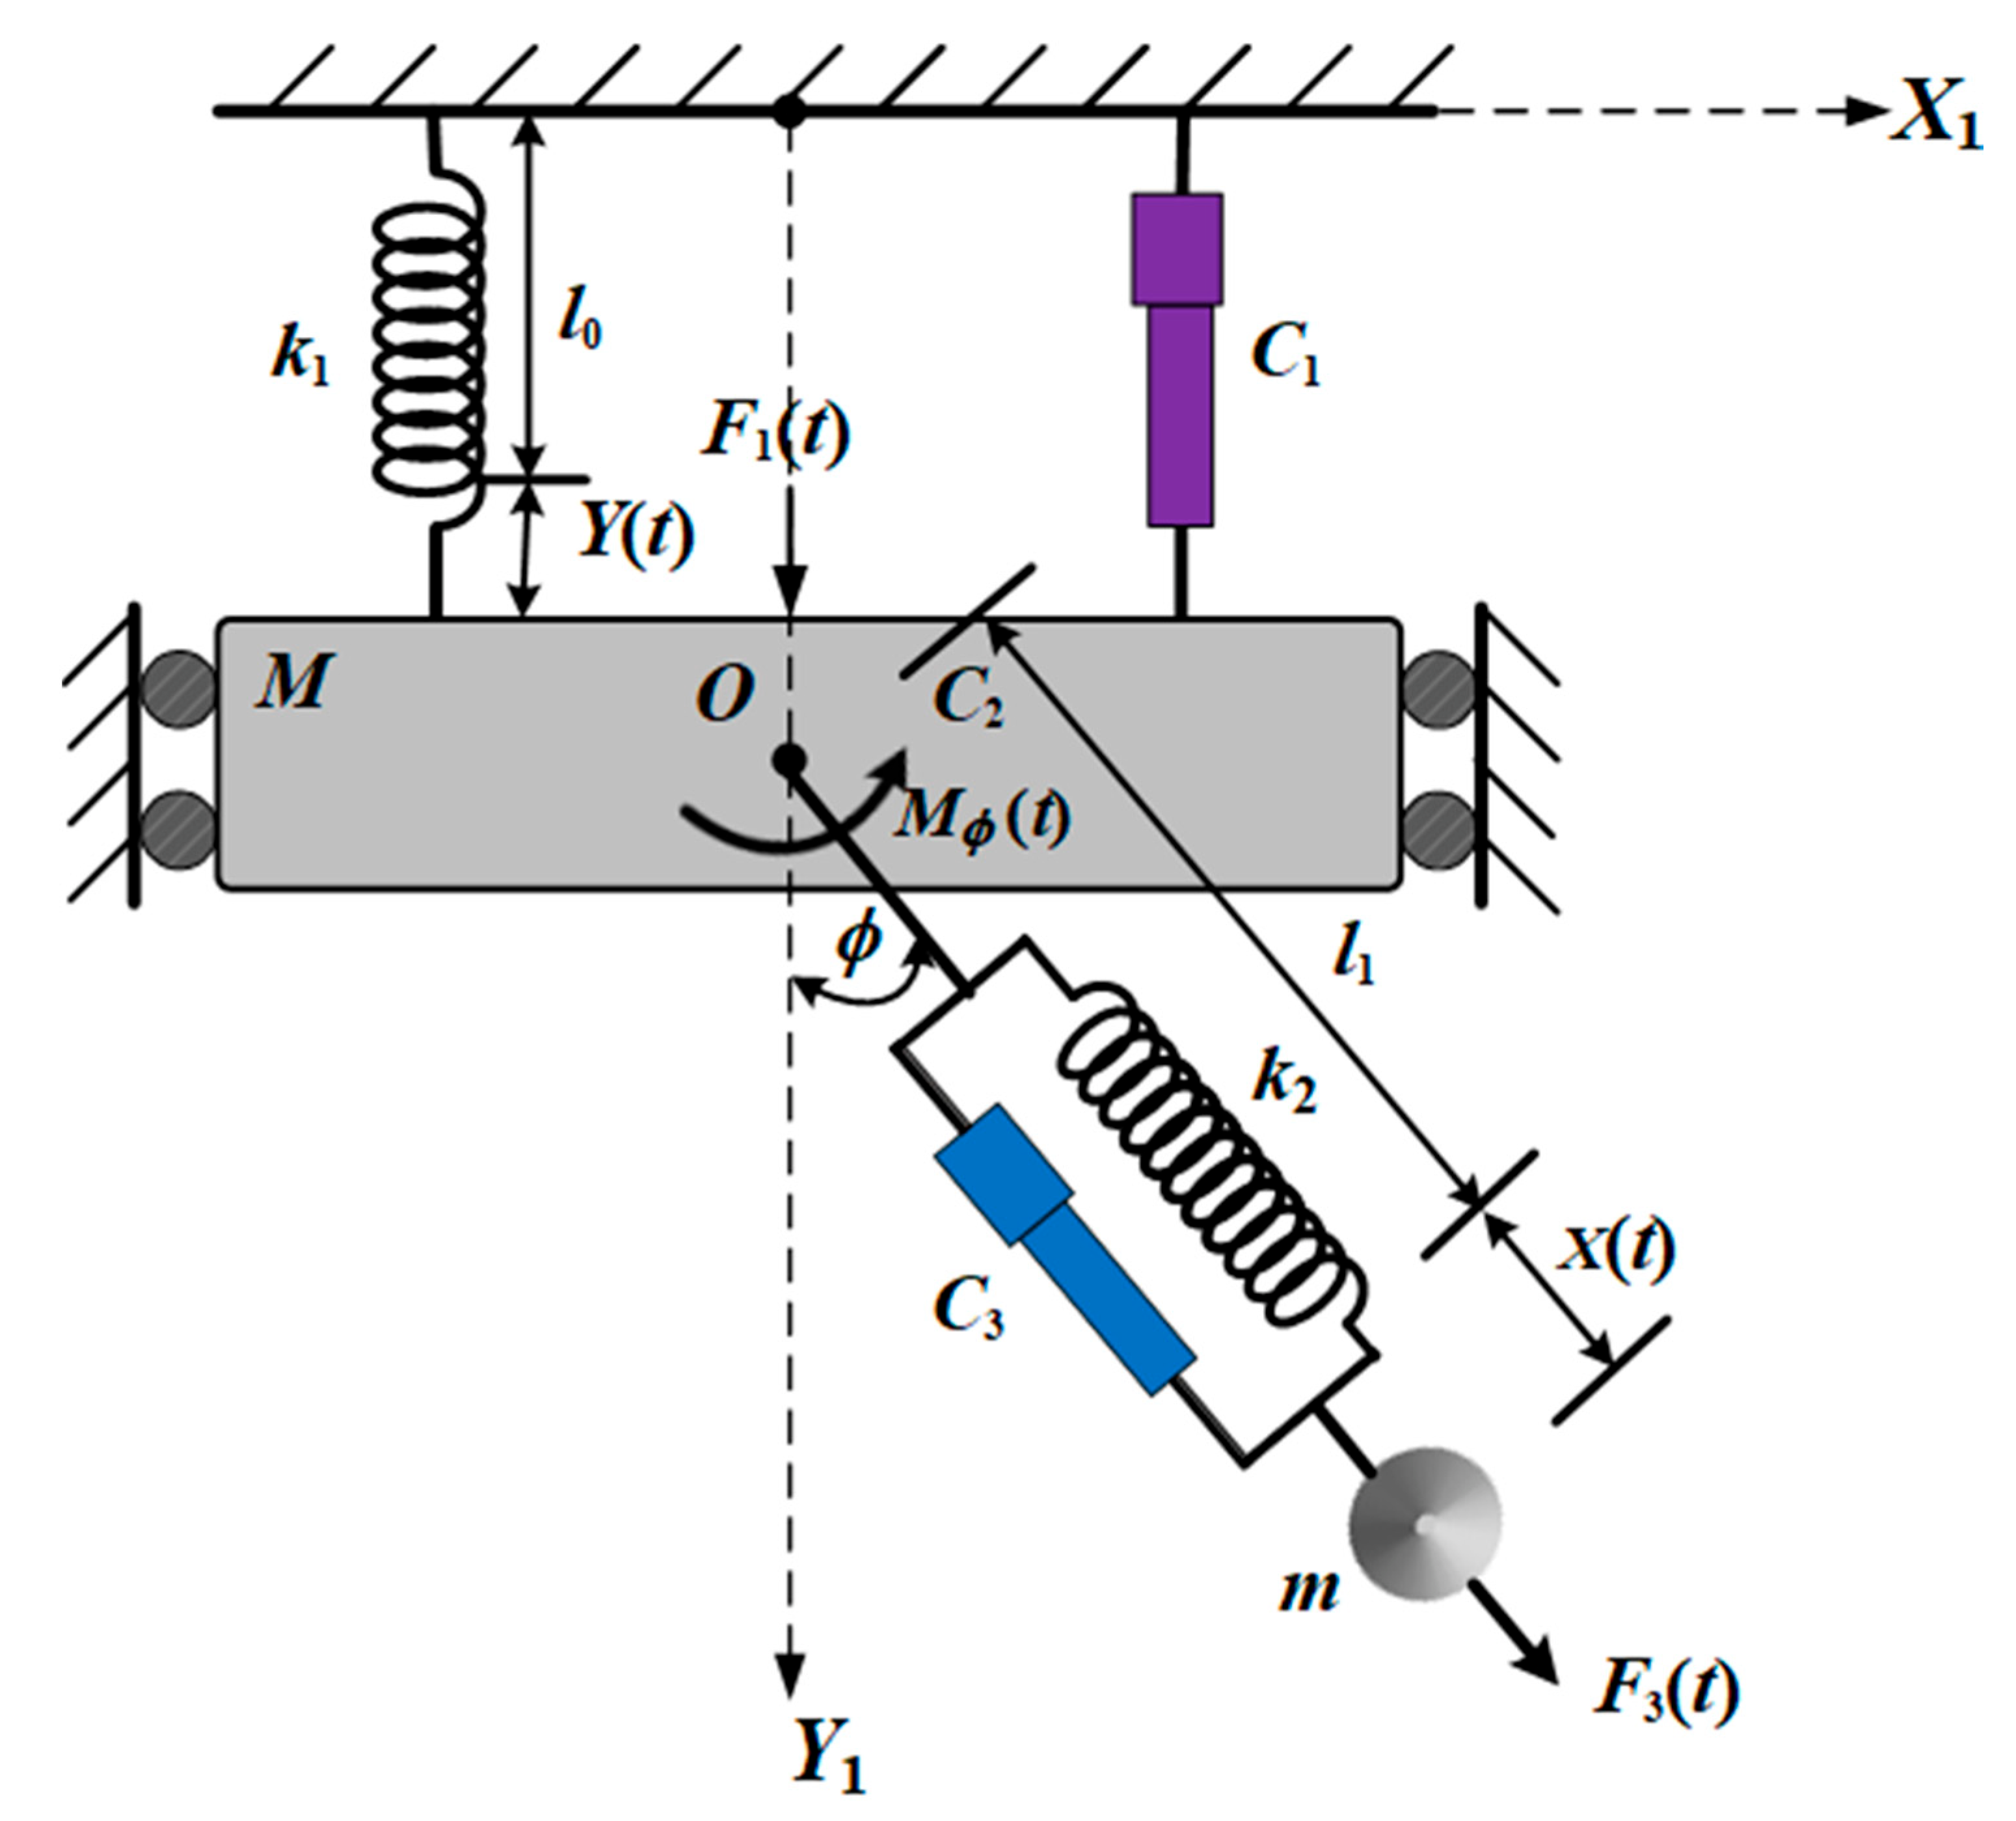

# Derivation of governing equations

By using the newton's equation of motions, \\
By considering the mass $m$ ,(relative to M mass)
\begin{align}
m\ddot{X} + C_3\dot{X} + K_2X = F_3
\end{align} \\
By considering the mass $M$, in $Y_1$ direction
\begin{align}
M\ddot{Y} + C_1\dot{Y} + K_1Y - (C_3\dot{X} + K_2X)cos\phi = F_1
\end{align} \\







By considering that the spring and the damper is massless and only considering the effect of mass For the rotational motion of the mass $m$,
\begin{align}
  I\ddot{\phi} + mg\,sin(\phi) (l_1+x) + C_2 \dot{\phi} = M_{\phi}(t)
\end{align} \\
where, $I= m(l_1+x)^2$

Since the small amplitude motion of the system is considered, $sin\,\phi \approx \phi$ and $mg\,\phi \, x \approx 0$, therefore the equation be written as,
\begin{align}
  m(l_1 + x)^2\ddot{\phi} + mg\, \, l_1 \phi+ C_2 \dot{\phi} = M_{\phi}(t)
\end{align}



above equations of motion can be wtitten as following matrix form;

\begin{align}
\begin{bmatrix} m & 0& 0\\0 & M& 0\\ 0 & 0& I\end{bmatrix}\begin{bmatrix} \ddot{X} \\ \ddot{Y} \\ \ddot{\phi}\end{bmatrix}+
\begin{bmatrix}  C_3 & 0& 0\\-C_3cosϕ & C_1& 0\\0 & 0& C_2\end{bmatrix} \begin{bmatrix}\dot{X} \\ \dot{Y} \\ \dot{\phi}\end{bmatrix}+
\begin{bmatrix}  K
_2 & 0& 0\\-K_2cosϕ & K_1& 0\\0 & 0& mgl_1\end{bmatrix}\begin{bmatrix} {X} \\ {Y} \\ \ {\phi}\end{bmatrix} =
\begin{bmatrix} F_3\\ F_1\\M_{\phi}(t)\end{bmatrix}
\end{align}

Let 
\begin{align}
X(t)=\begin{bmatrix} {X} \\ {Y} \\ {\phi}\end{bmatrix},\:\:\:\:F(t)=\begin{bmatrix} F_3\\ F_1\\M_{\phi}(t)\end{bmatrix},\:\:\:\:
M=\begin{bmatrix} m & 0& 0\\0 & M& 0\\ 0 & 0& I\end{bmatrix},\:\:\:\: C= \begin{bmatrix} C_3 & 0& 0\\-C_3cosϕ & C_1& 0\\0 & 0& C_2 \end{bmatrix} \:\:\:\: \\
K=\begin{bmatrix} K_2 & 0& 0\\-K_2cosϕ & K_1& 0\\0 & 0& mgl_1 \end{bmatrix}
\end{align}
Then we can write the above equations as
\begin{align}
M\ddot{X}+C\dot{X}+KX=F(t).
\end{align}

## Symbolic computations

In [3]:
from sympy import symbols
from sympy import *

In [4]:
m, M, I, C1, C2, C3, K1, K2, g, L1, phi = symbols("m, M, I, C_1, C_2, C_3, K_1, K_2, g, l_1, phi")

# Matrix M
M = Matrix([[m, 0, 0],
           [0, M, 0],
           [0, 0, I]])
C = Matrix([[C3, 0, 0],
           [-C3*cos(phi), C1, 0],
           [0, 0, C2]])
K = Matrix([[K2, 0, 0],
            [-K2*cos(phi), K1, 0],
            [0, 0, m*g*L1]])


In [5]:
M_invs = M.inv()
Omega = M_invs*K
Omega

Matrix([
[          K_2/m,     0,         0],
[-K_2*cos(phi)/M, K_1/M,         0],
[              0,     0, g*l_1*m/I]])

In [6]:
latex(Omega)

'\\left[\\begin{matrix}\\frac{K_{2}}{m} & 0 & 0\\\\- \\frac{K_{2} \\cos{\\left(\\phi \\right)}}{M} & \\frac{K_{1}}{M} & 0\\\\0 & 0 & \\frac{g l_{1} m}{I}\\end{matrix}\\right]'

\begin{align}
  \left[\begin{matrix}\frac{K_{2}}{m} & 0 & 0\\- \frac{K_{2} \cos{\left(\phi \right)}}{M} & \frac{K_{1}}{M} & 0\\0 & 0 & \frac{g l_{1} m}{I}\end{matrix}\right]
\end{align}

In [7]:
Omega.eigenvals()

{K_2/m: 1, K_1/M: 1, g*l_1*m/I: 1}

In [8]:
latex(Omega.eigenvals())

'\\left\\{ \\frac{K_{1}}{M} : 1, \\  \\frac{K_{2}}{m} : 1, \\  \\frac{g l_{1} m}{I} : 1\\right\\}'

Eigen values are
\begin{align}
  \left\{ \frac{K_{1}}{M} : 1, \  \frac{K_{2}}{m} : 1, \  \frac{g l_{1} m}{I} : 1\right\}
\end{align}

In [9]:
Xbar1 = Omega.eigenvects()[0][2][0]
Xbar2 = Omega.eigenvects()[1][2][0]
Xbar3 = Omega.eigenvects()[2][2][0]

In [10]:
Xbar1

Matrix([
[0],
[1],
[0]])

In [11]:
latex(Xbar1)

'\\left[\\begin{matrix}0\\\\1\\\\0\\end{matrix}\\right]'

In [12]:
Xbar2

Matrix([
[(K_1*m - K_2*M)/(K_2*m*cos(phi))],
[                               1],
[                               0]])

In [13]:
latex(Xbar2)

'\\left[\\begin{matrix}\\frac{K_{1} m - K_{2} M}{K_{2} m \\cos{\\left(\\phi \\right)}}\\\\1\\\\0\\end{matrix}\\right]'

In [14]:
Xbar3

Matrix([
[0],
[0],
[1]])

In [15]:
latex(Xbar3)

'\\left[\\begin{matrix}0\\\\0\\\\1\\end{matrix}\\right]'

The eigen vectors are,
\begin{align}
  &\left[\begin{matrix}0\\1\\0\end{matrix}\right]
  \\
  &\left[\begin{matrix}\frac{K_{1} m - K_{2} M}{K_{2} m \cos{\left(\phi \right)}}\\1\\0\end{matrix}\right]
  \\
  &\left[\begin{matrix}0\\0\\1\end{matrix}\right]
\end{align}


# 3)Simulation of the motion

in order to obtain the state variables,let's consider
\begin{align}
x_1 &= X \\
x_2 &= Y \\
x_3 &= \theta \\
x_4 &= \dot{X} \\
x_5 &= \dot{Y} \\
x_6 &= \dot{\theta}
\end{align} \\
By differentiating the above,
\begin{align}
\dot{x}_1 &= \dot{X} \\
\dot{x}_2 &= \dot{Y} \\
\dot{x}_3 &= \dot{\theta} \\
\dot{x}_4 &= \ddot{X} \\
\dot{x}_5 &= \ddot{Y} \\
\dot{x}_6 &= \ddot{\theta}
\end{align} \\

Therefore, by considering $X$ as,
\begin{align}
X=\begin{bmatrix} x_1 \\ x_2 \\  x_3 \\ x_4 \\  x_5 \\ x_6   \end{bmatrix}
\end{align} \\
from the equations of motion, we can write as,
\begin{align}
\dot{x}_1 &= x_4 \\
\dot{x}_2 &= x_5 \\
\dot{x}_3 &= x_6
\end{align} \\

\begin{align}
\dot{x}_4 &= - \frac{K_2}{m}x_1 -\frac{C_3}{m}x_4  +F_3(t)\frac{1}{m}\\
\dot{x}_5 &= \frac{K_2cos\phi}{M}x_1 -\frac{K_1}{M}x_2 + \frac{C_3cos\phi}{M}x_4 -\frac{C_1}{M}x_5 + F_1(t)\frac{1}{M} \\
\dot{x}_6 &= -\frac{C_2}{I}x_3  -\frac{mgl_1}{I}x_6 + M_{\phi}(t)\frac{1}{I}
\end{align} \\
Therefor we can write the above set of equations in the matrix form as,
\begin{align}
\begin{bmatrix} \dot{x}_1 \\ \dot{x}_2 \\  \dot{x}_3 \\ \dot{x}_4 \\  \dot{x}_5 \\ \dot{x}_6   \end{bmatrix} = \begin{bmatrix}
0 & 0 & 0 & 1 & 0 & 0 \\
 0 & 0 &0 & 0 & 1 & 0 \\
0 & 0 &0 & 0 & 0 & 1 \\
- \frac{K_2}{m} & 0 & 0 & -\frac{C_3}{m} & 0 & 0  \\ \frac{K_2cos\phi}{M} & -\frac{K_1}{M} & 0 & \frac{C_3cos\phi}{M} & -\frac{C_1}{M} & 0  \\
0 & 0 & -\frac{C_2}{I} & 0 & 0 & -\frac{mgl_1}{I} \end{bmatrix} 
\begin{bmatrix} x_1 \\ x_2 \\  x_3 \\ x_4 \\  x_5 \\ x_6   \end{bmatrix} + \begin{bmatrix} 0 & 0 & 0  \\ 0 & 0 & 0  \\  0 & 0 & 0  \\ \frac{1}{m} & 0 & 0  \\  0 & \frac{1}{M} & 0 \\ 0 & 0 & \frac{1}{I} \end{bmatrix} \begin{bmatrix} F_3(t) \\ F_1(t) \\  M_{\phi}(t)   \end{bmatrix}
\end{align} \\
The above set of matrix can be written in the form of $\dot{X} = AX + Bf(t)$, where
\begin{align}
A &= \begin{bmatrix}
0 & 0 & 0 & 1 & 0 & 0 \\
 0 & 0 &0 & 0 & 1 & 0 \\
0 & 0 &0 & 0 & 0 & 1 \\
- \frac{K_2}{m} & 0 & 0 & -\frac{C_3}{m} & 0 & 0  \\ \frac{K_2cos\phi}{M} & -\frac{K_1}{M} & 0 & \frac{C_3cos\phi}{M} & -\frac{C_1}{M} & 0  \\
0 & 0 & -\frac{C_2}{I} & 0 & 0 & -\frac{mgl_1}{I} \end{bmatrix} \\
B &= \begin{bmatrix} 0 & 0 & 0  \\ 0 & 0 & 0  \\  0 & 0 & 0  \\ \frac{1}{m} & 0 & 0  \\  0 & \frac{1}{M} & 0 \\ 0 & 0 & \frac{1}{I} \end{bmatrix} \\
f(t) &= \begin{bmatrix} F_3(t) \\ F_1(t) \\  M_{\phi}(t)   \end{bmatrix}
\end{align}

# Simulation

## Obtaining the Numerical solution using Runga Kutta Method and plotting the solution

### Defining values for constants, damping ratios and masses

In [48]:
K1  = 1;
K2  = 2;
C1  = 0.01;
C2  = 0.02;
C3  = 0.03;
m   = 1;
M   = 2;
I   = 1;
g   = 9.81;
l   = 0.5;
F1  = 0.1;
F3  = 0.2;
M_Phi = 0.3;
phi = 30

### Obtaining the natural frequencies 

In [41]:

M = np.array([[m, 0, 0],
           [0, M, 0],
           [0, 0, I]])
"""C = Matrix([[C3, 0, 0],
           [-C3*cos(phi), C1, 0],
           [0, 0, C2]])"""
K = np.array([[K2, 0, 0],
            [-K2*np.cos(phi), K1, 0],
            [0, 0, m*g*l]])

# find the natural frequencies
from scipy.integrate import odeint
from numpy.linalg import eig
M_inv=np.linalg.inv(M)
#Omega =np.dot(np.dot(M_inv, K), -C)
Omega=M_inv @ K
eigvals=np.linalg.eigvals(Omega)



natural_freq = np.sqrt(np.abs(eigvals))
print("Natural Frequecy =",natural_freq[0])
print("Natural Frequecy =",natural_freq[1])
print("Natural Frequecy =",natural_freq[2])


Natural Frequecy = 0.7071067811865476
Natural Frequecy = 1.4142135623730951
Natural Frequecy = 2.4261079942986874


### Displacement and velocity plots

In [92]:
def f(t, y):
    X,Y,Phi,dX,dY,dPhi=y

    ddX= -(C3/m)*dX-(K2/m)*X+(F3*np.sin(omega*t))/m
    ddY= -(C1/M)*dY-(K1/M)*Y+((C3*dX-K2*X)/M)*np.cos(Phi) +(F1*np.sin(omega*t))/M
    #ddPhi=-(m*g*l*Phi)/(I*m)-(C2*dPhi)/(I*m)+(M_Phi)/(I*m)
    ddPhi=-(m*g*l*Phi)/(I)-(C2*dPhi)/(I)+(M_Phi*np.sin(omega*t))/(I)

    return [dX,dY,dPhi, ddX, ddY, ddPhi]


# Setting the initial conditions for x1,x2,x3,dx1,dx2,dx3
y0 = [0, 0, 0, 0, 0, 0]

# Set the time span
t_span = np.linspace(0, 50, 5000)

# The external forces applied to the system
omega = 0.5; F3 = 0.1; F1 = 0.2; M_Phi = 0.2                                                                    
#omega = 0.7; F3 = 0.1; F1 = 0.2; M_Phi = 0.2
#omega = 1.4; F3 = 0.1; F1 = 0.2; M_Phi = 0.2
#omega = 2.4; F3 = 0.1; F1 = 0.2; M_Phi = 0.2
F = np.array([[1*np.sin(omega*t_span), 0, 0]])

    
# Solve the system using the Runge-Kutta method
sol = solve_ivp(f, [t_span[0], t_span[-1]], y0, t_eval=t_span, method='RK45')

X = sol.y[0,:]
Y = sol.y[1,:]
Phi = sol.y[2,:] 
dX = sol.y[3,:] 
dY = sol.y[4,:] 
dPhi = sol.y[5,:] 

# Set up the plot
fig1 = make_subplots(rows=1, cols=1,
                    specs=[[{"type": "scatter"}]])
fig2 = make_subplots(rows=1, cols=1,
                    specs=[[{"type": "scatter"}]])

fig1.add_trace(go.Scatter(y=X, x=t_span,
                         mode="markers",
                         marker=dict(size=2, color="blue"), 
                         name = "X"),
              )

fig1.add_trace(go.Scatter(y=Y, x=t_span,
                         mode="markers",
                         marker=dict(size=2, color="red"),
                         name = "Y"),
              )

fig1.add_trace(go.Scatter(y=Phi, x=t_span,
                         mode="markers",
                         marker=dict(size=2, color="green"),
                         name = "Phi"),
              )

fig2.add_trace(go.Scatter(y=dX, x=t_span,
                         mode="markers",
                         marker=dict(size=2, color="purple"),
                         name = "dX"),
              )

fig2.add_trace(go.Scatter(y=dY, x=t_span,
                         mode="markers",
                         marker=dict(size=2, color="magenta"),
                         name = "dY"),
              )

fig2.add_trace(go.Scatter(y=dPhi, x=t_span,
                         mode="markers",
                         marker=dict(size=2, color="red"),
                         name = "dPhi"),
              )

fig1.update_xaxes(title_text="time", range=[0, 50])
fig1.update_yaxes(title_text="Position", range=[-0.5, 0.4])
fig1.update_layout(title_text="Coupled Torsional and Translational motion - Positional varition")

fig2.update_xaxes(title_text="time", range=[0, 50])
fig2.update_yaxes(title_text="Velocity", range=[-0.3, 0.3])
fig2.update_layout(title_text="Coupled Torsional and Translational motion - Velocity variation")


fig1.show()
fig2.show()

<ipython-input-92-81d28d993c08>:23: VisibleDeprecationWarning:

Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.



In [93]:
X_pos = sol.y[0,:]
Y_pos = sol.y[1,:]
Phi_pos = sol.y[2,:] 

t_span = sol.t
l=0.6


# Define the data and layout for the initial frame
X_initial = X_pos[0]
Y_initial = Y_pos[0]
Phi_initial = Phi_pos[0]

fig = make_subplots(rows=1, cols=1,
                    specs=[[{"type": "scatter"}]])

fig.add_trace(go.Scatter(x=[0], y=[Y_initial],
                         mode="markers",
                         marker=dict(size=30, color="blue"),
                         name = "M"),
              )

fig.add_trace(go.Scatter(x=[(l+X_initial)*np.sin(Phi_initial)], y=[-(l+X_initial)*np.cos(Phi_initial)],
                         mode="markers",
                         marker=dict(size=20, color="red"),
                         name = "m"),
              )



fig.update_xaxes(title_text="X Position", range=[-0.2,0.2])
fig.update_yaxes(title_text="Y Position", range=[-1.5, 0.5])
fig.update_layout(title_text="Coupled Torsional and Translational System Animation")

# Define the animation frames
frames = [go.Frame(data=[
                        go.Scatter(x=[0], y=[Y_pos[i]], 
                                   mode="markers", 
                                   marker=dict(size=30, color="blue"),
                                   name = "M"),
                        go.Scatter(x=[(l+X_pos[i])*np.sin(Phi_pos[i])], y=[-(l+X_pos[i])*np.cos(Phi_pos[i])], 
                                   mode="markers", 
                                   marker=dict(size=20, color="red"),
                                   name = "m")
                        ]
                   ) 
          for i in range(len(t_span))
         ]

# Add frames and animation settings
fig.frames = frames

animation_settings = dict(frame=dict(duration=10, readraw=True),
                          fromcurrent=True,
                          transition=dict(duration=0),
                          )

fig.update_layout(updatemenus=[dict(type="buttons",
                                    showactive=False,
                                    buttons=[dict(label="Play",
                                                  method="animate",
                                                  args=[None, animation_settings]
                                                  ),
                                             dict(label="Pause",
                                                  method="animate",
                                                  args=[[None], animation_settings]
                                                  )
                                             ],
                                    )
                               ]
                  )

# Show the animation
fig.show()

# Tried out approaches

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
import math

K1  = 1;
K2  = 2;
C1  = 1;
C2  = 2;
C3  = 3;
m   = 1;
M   = 2;
I   = 1;
g   = 9.81;
l   = 4;
phi = 1;
cos_phi = math.cos(phi);


F = np.array([[0.1, 0.2, 0.3]])  # external force (in N)

# Define the initial conditions
x0 = np.array([0.1, 0, 0, 0.1, 0, 0])  # initial displacement and velocity of each object

# Define the time steps and time vector
dt = 0.01  # time step (in s)
t = np.arange(0, 10, dt)  # time vector (in s)

# Define the state-space matrices
A=np.array([[0,0,0,1,0,0],
            [0,0,0,0,1,0],
            [0,0,0,0,0,1],
            [-K2/m, 0,0, -C3/m,0,0],
            [K2*cos_phi/M,-K1/M,0,C3*cos_phi/M, -C1/M,0],
            [0,0,-C2/I, 0, 0 ,-m*g*l/I]]);
B=np.array([[0,0,0],
            [0,0,0],
            [0,0,0],
            [1/m,0,0],
            [0,1/M,0],
            [0,0,1/I]]);

C = np.array([1, 0, 0, 0, 0, 0])
D = np.array([0, 0, 0, 0, 0, 0])

# Define the function to simulate the system
def simulate_system(x0):
    x = np.array([0,0,0,0,0,0,0])
    
    for i in range(0, 5):
        u = np.transpose(F[:, i-1])
        #x[i] = x[i-1] + dt * (A @ x[i-1] + B @ u)
        #x[i] = x[i-1] + dt * (np.dot(A,x[i-1]) + np.dot(B,u))
        x[i] = np.dot(A[i],x0) + np.dot(B[i],F) 
    return x

# Define the function to animate the system
def animate_system(x):
    fig, ax = plt.subplots()
    ax.set_xlim(-1, 1)
    ax.set_ylim(-1, 1)
    ax.set_aspect('equal')
    ax.set_xlabel('X-axis')
    ax.set


# Simulate the system and animate the motion
x = simulate_system(x0)
animate_system


ValueError: ignored

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
import math

K1  = 1;
K2  = 2;
C1  = 1;
C2  = 2;
C3  = 3;
m   = 1;
M   = 2;
I   = 1;
g   = 9.81;
l   = 4;
phi = 1;
cos_phi = math.cos(phi);


F = np.array([[0.1, 0.2, 0.3]])  # external force (in N)

# Define the initial conditions
x0 = np.array([0.1, 0, 0, 0.1, 0, 0])  # initial displacement and velocity of each object

# Define the time steps and time vector
dt = 0.01  # time step (in s)
t = np.arange(0, 10, dt)  # time vector (in s)

# Define the state-space matrices
A=np.array([[0,0,0,1,0,0],
            [0,0,0,0,1,0],
            [0,0,0,0,0,1],
            [-K2/m, 0,0, -C3/m,0,0],
            [K2*cos_phi/M,-K1/M,0,C3*cos_phi/M, -C1/M,0],
            [0,0,-C2/I, 0, 0 ,-m*g*l/I]]);
B=np.array([[0,0,0],
            [0,0,0],
            [0,0,0],
            [1/m,0,0],
            [0,1/M,0],
            [0,0,1/I]]);

C = np.array([1, 0, 0, 0, 0, 0])
D = np.array([0, 0, 0, 0, 0, 0])

# Define the function to simulate the system
def simulate_system(A, B, F, x0):

    x = np.zeros((len(t), len(x0)))
    x[0] = x0
    x[1] = 
    
    return x

# Define the function to animate the system
def animate_system(x):
    fig, ax = plt.subplots()
    ax.set_xlim(-1, 1)
    ax.set_ylim(-1, 1)
    ax.set_aspect('equal')
    ax.set_xlabel('X-axis')
    ax.set


# Simulate the system and animate the motion
x = simulate_system(x0)
animate_system

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

# Define the system parameters
m1 = 1    # mass of object 1 (in kg)
m2 = 2    # mass of object 2 (in kg)
k1 = 20   # spring constant of spring 1 (in N/m)
k2 = 10   # spring constant of spring 2 (in N/m)
I = 0.5   # moment of inertia (in kg*m^2)
L = 0.5   # natural length of springs (in m)
b1 = 0.1  # damping coefficient of damper 1 (in N*s/m)
b2 = 0.2  # damping coefficient of damper 2 (in N*s/m)
b3 = 0.3  # damping coefficient of damper 3 (in N*s/m)
F = np.array([[0.1, 0.2, 0.3]]).T  # external force (in N)

# Define the initial conditions
x0 = np.array([0.1, 0, 0, 0.1, 0, 0])  # initial displacement and velocity of each object

# Define the time steps and time vector
dt = 0.01  # time step (in s)
t = np.arange(0, 10, dt)  # time vector (in s)

# Define the state-space matrices
A = np.array([[0, 0, 1, 0, 0, 0],
              [0, 0, 0, 0, 1, 0],
              [-k1/m1, k1/m1, -b1/m1, 0, 0, 0],
              [0, 0, 0, 0, 0, 1],
              [0, 0, 0, -k2/m2, k2/m2, -b2/m2],
              [0, 0, 0, 0, 0, -b3/I]])
B = np.array([[0, 0, 0],
              [0, 0, 0],
              [0, 0, 0],
              [0, 0, 0],
              [0, 0, 0],
              [0, 0, 1/I]])
C = np.array([1, 0, 0, 0, 0, 0])
D = np.array([0, 0, 0, 0, 0, 0])

# Define the function to simulate the system
def simulate_system(x0):
    x = np.zeros((len(t), len(x0)))
    x[0] = x0
    for i in range(1, len(x0)):
        #u = F[i-1]#.reshape(3, 1)
        x[i] = x[i-1] + dt * (A[i-1] @ x[i-1] + B[i-1] @ F)
    return x

# Define the function to animate the system
def animate_system(x):
    fig, ax = plt.subplots()
    ax.set_xlim(-1, 1)
    ax.set_ylim(-1, 1)
    ax.set_aspect('equal')
    ax.set_xlabel('X-axis')
    ax.set_ylabel('Y-axis')
    line1, = ax.plot([], [], 'o-', lw=2)
    line2, = ax.plot([], [], 'o-', lw=2)


# Call the simulate_system function with the initial conditions
x = simulate_system(x0)

# Call the animate_system function with the resulting state matrix





In [ ]:
K1  = 1;
K2  = 2;
C1  = 1;
C2  = 2;
C3  = 3;
m   = 1;
M   = 2;
I   = 1;
g   = 9.81;
l   = 4;
phi = 1;
cos_phi = math.cos(phi);

# Define the state-space matrices
A=np.array([[0,0,0,1,0,0],
            [0,0,0,0,1,0],
            [0,0,0,0,0,1],
            [-K2/m, 0,0, -C3/m,0,0],
            [K2*cos_phi/M,-K1/M,0,C3*cos_phi/M, -C1/M,0],
            [0,0,-C2/I, 0, 0 ,-m*g*l/I]]);
B=np.array([[0,0,0],
            [0,0,0],
            [0,0,0],
            [1/m,0,0],
            [0,1/M,0],
            [0,0,1/I]]);

omega=0; f0=np.array([[0.1, 0.2, 0.3]]) ; ICs=[0.1, 0, 0, 0.1, 0, 0]
yy=mv.simulateDySystem(50,0.01,ICs,A,B,[f0,omega],'Time/t','X(t)')